<a href="https://colab.research.google.com/github/zzhining/ml_basic/blob/main/classifier_goms_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분석 데이터

* [고용조사분석시스템](https://survey.keis.or.kr/goms/gomsdownload/List.jsp)

- 대졸자들의 노동시장 진입과 정착 과정에 대한 실증적 자료가 요구됨에 따라  『대졸자직업이동경로조사』를 실시
- 대졸자의 교육과정, 구직활동, 일자리경험, 직업훈련, 자격증, 개인신상정보 및 가계배경 등 노동시장 진입 및 정착에 영향을 줄 수 있는 항목 조사
- GOMS2019.csv
    - shape: (11652, 130)
- GOMS2019_columns.csv
    - shape: (159, 3)


# 환경설정

In [1]:
# (라이브러리 설치 후 런타임 재시작 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

# 데이터 불러오기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# GOMS2019.csv 파일을 읽어오기
df = pd.read_csv('https://raw.githubusercontent.com/zzhining/public_data_analysis/main/dataset/GOMS2019.csv')
df_columns = pd.read_csv('https://raw.githubusercontent.com/zzhining/public_data_analysis/main/dataset/GOMS2019_columns.csv')

df.shape, df_columns.shape

((11652, 130), (159, 3))

In [3]:
# Matplotlib 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 데이터 전처리

In [4]:
col_name = df_columns.loc[:, ['columns', 'desc']].values
df.rename(columns = dict(col_name), inplace = True)

In [5]:
df.head()

,이직여부,전공계열,학교유형,학교소재지,성별,연령,졸업년,현 일자리 시작년,21,10,...,지난 해 소득_만원,가족에게 경제적 지원을 받고 있는지 여부,가족에게 경제적 지원을 하고 있는지 여부,군 복무 경험,전년도 월평균 생활비 지출액,전년도 월평균 주거비 지출액,전년도 월평균 공교육비 지출액,전년도 월평균 사교육비 지출액,생활비 충당 방식,wt
0,2,1,1,8,1,21.750000,2018,2018,7,7,...,1008,2,2,6,30,0,0,0,1,20.945343
1,1,1,1,8,1,25.250000,2018,2018,7,1,...,540,2,2,3,60,10,0,10,1,19.420393
2,2,1,1,8,1,24.500000,2018,2018,9,1,...,1570,2,2,2,30,0,0,0,1,19.420393
3,2,1,1,10,1,26.000000,2018,2018,3,7,...,1560,2,1,2,150,35,0,0,1,11.549823
4,2,1,1,1,2,25.083333,2017,2019,7,7,...,0,2,-1,1,120,50,0,0,1,37.668984


## 결측치 확인

In [6]:
df.isna().sum().sum()

0

## 데이터 분할

In [8]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:]
y = df['이직여부']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 의사결정나무 학습

의사결정나무 모델을 생성합니다. 깊이가 너무 깊어지면 과적합의 우려가 있기 때문에, 최대 깊이는 4로 설정합니다.

In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth  = 4)
model = model.fit(X_train, y_train)

# 평가

model의 정확도를 출력합니다.

In [10]:
print(model.score(X_test, y_test))

0.7906477906477907


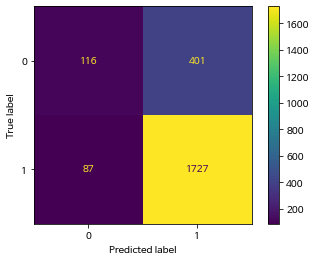

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# 예측
y_pred = model.predict(X_test)

# 혼동행렬 생성
cm = confusion_matrix(y_test, y_pred)

# 혼동행렬 시각화
cm_display = ConfusionMatrixDisplay(cm).plot()

# 의사결정나무 해석

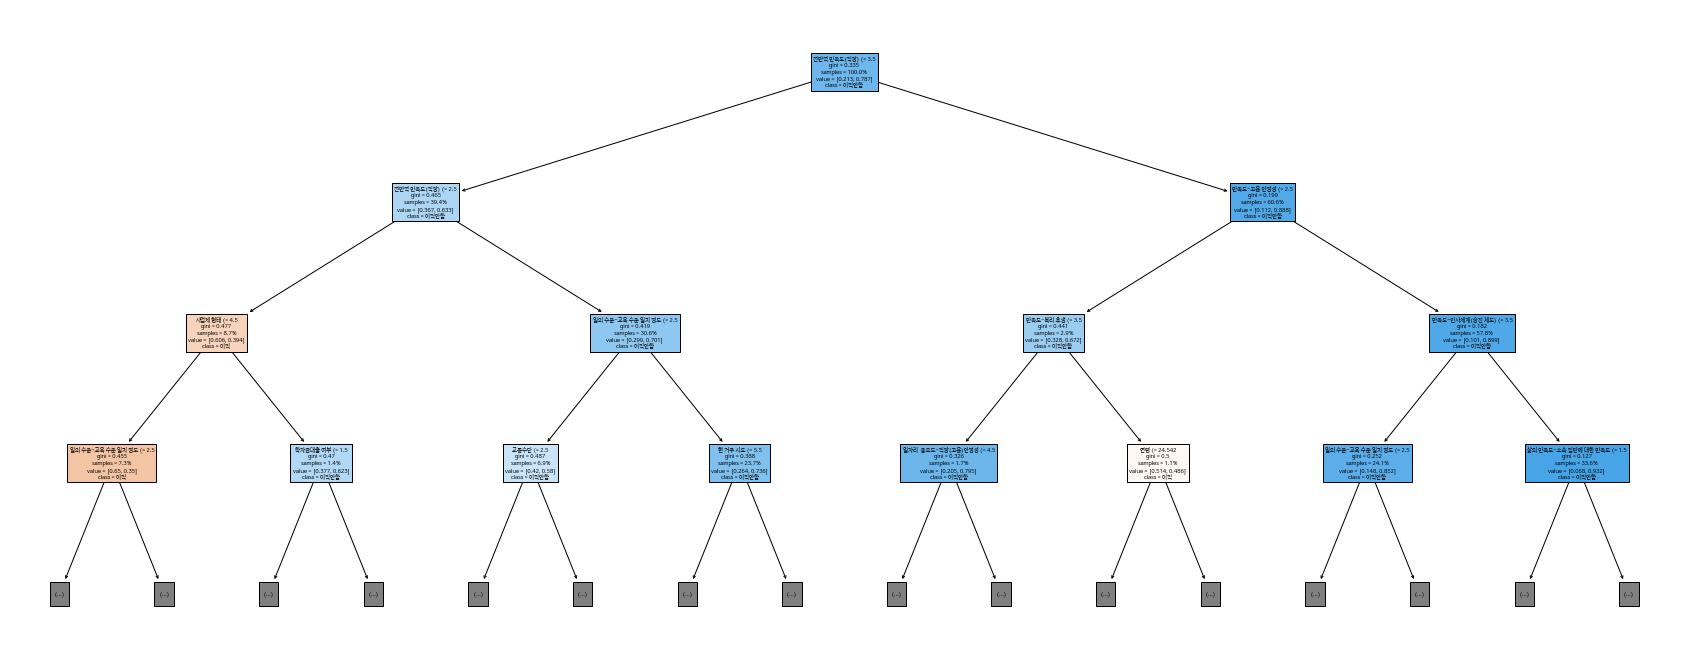

In [18]:
from sklearn import tree
fig, ax = plt.subplots(figsize = (30, 12))
tree.plot_tree(model, max_depth = 3, class_names = ['이직', '이직안함'], feature_names = list(X_test), proportion = True, filled = True);

## 중요 feature

의사결정나무에 중요한 영향을 끼치는 (이직 여부에 영향을 끼치는) 변수를 찾아보겠습니다.`feature_importancces_` 변수를 통해 중요도 순위를 확인할 수 있습니다.

In [13]:
importance = pd.DataFrame()
importance['columns'] = df.columns[1:]
importance['importance'] = model.feature_importances_
importance = importance.sort_values('importance', ascending = False)
importance.head()

,columns,importance
37,전반적 만족도(직장),0.73
39,일의 수준-교육 수준 일치 정도,0.08
24,만족도-고용 안정성,0.05
31,만족도-인사체계(승진 제도),0.03
15,사업체 형태,0.03


전반적 만족도, 일의 수준-교육 수준 일치 정도, 만족도-고용 안정성 등이 이직 여부에 중요한 영향을 미치는 것을 확인할 수 있습니다.